In [2]:
#! python3
# Data Science - Capstone 1
# Jacob Kovach

import numpy as np, matplotlib.pyplot as plt, pandas as pd, os
%matplotlib inline

'''
Summary: 

A common talking point in US politics is the promotion of policies to enforce a livable wage. 
Using data gathered on minimum wages from 1968 to 2017 and rental cost data from 1940 to 2000, 
as well as other data sources I aim calculate on a per year, and per state basis, whether a state’s 
minimum wage (or overriding federal law) provided a wage that constitutes “livable”.

Primary data is included below. Additional sources are cited at the conclusion of this notebook and
annotated within the text.
'''

os.chdir('/Users/JKovach/Documents/test projects')
wage = pd.read_csv('./duptest14_Capstone1/Wage Affordability Data.csv', encoding = "ISO-8859-1")
print(wage)

      Year                 State           Table_Data Footnote  High.Value  \
0     1968               Alabama                  ...      NaN     0.00000   
1     1968                Alaska                  2.1      NaN     2.10000   
2     1968               Arizona  18.72 - 26.40/wk(b)      (b)     0.66000   
3     1968              Arkansas          1.25/day(b)      (b)     0.15625   
4     1968            California              1.65(b)      (b)     1.65000   
5     1968              Colorado       1.00 - 1.25(b)      (b)     1.25000   
6     1968           Connecticut                  1.4      NaN     1.40000   
7     1968              Delaware                 1.25      NaN     1.25000   
8     1968  District of Columbia          1.25 - 1.40      NaN     1.40000   
9     1968        Federal (FLSA)        $1.15 & $1.60      NaN     1.60000   
10    1968               Florida                  ...      NaN     0.00000   
11    1968               Georgia                  ...      NaN  

In [3]:
'''
Hypothesis and Questions:

In the face of popular opinion, I wanted to see how often minimum wage (either federally or state imposed) 
compares to a “livable wage” by comparing minimum wage to the average median rent in each state for each 
year between 1968 and 2016. Prevailing financial advice generally dictates that housing accounts for no 
more than 1/3rd of an individual’s total gross income. Additionally, the CPI gives housing a weight of 
42% of an individual’s income (unsure whether this is cause or effect). Using this metric as a goalpost, 
I will compare the monthly earnings of a minimum wage worker and compare median rent prices as a 
percentage of earnings.

In this study I want to answer the following questions:
   1. Has the minimum wage historically been a “livable wage” (sufficient to afford housing as either 33% 
      or 42% of wages), and is it currently “livable”?
   2. If minimum wage is not currently “livable”, when did wages begin to diverge from housing 
      affordability? If wages have not been historically “livable” is there significant movement in the 
      disparity between wages and housing costs over time?
   3. Has there been significant movement recently to incite conversation about the sufficiency of wages?

Method:

Because most people making minimum wage are likely renting (vs. owning) their home, I researched US census 
data for median rental prices by state. In this study, I use two sources for median rent prices, one from 
census.gov website (https://www2.census.gov/programs-surveys/decennial/tables/time-series/coh-grossrents/grossrents-adj.txt) 
for data between 1940 and 2000, and one from the Institute for Policy and Social Research at the University 
of Kansas (http://www.ipsr.ku.edu/ksdata/ksah/housing/4house10.pdf) for data from 2000-2016. Rent prices for 
2000 were congruent between both studies, however, while the census.gov source adjusted rent prices to year 
2000 USD, I am unsure if the KU study did so as well. This could have deleterious effects on this study.

Census data for both studies only provided a data point once per decade (1940-2010, 2016). To get data for 
each year in between, data was normalized by taking the change in price between decades (yc), and divided by 
the number of years between data points (yc = (y2-y1)/10). This normalization may have on the quality of the 
data as well.

Minimum wage data exists for 2017 but I was unable to find median rent data for that year.
'''

'\nHypothesis and Questions:\n\nIn the face of popular opinion, I wanted to see how often minimum wage (either federally or state imposed) \ncompares to a “livable wage” by comparing minimum wage to the average median rent in each state for each \nyear between 1968 and 2016. Prevailing financial advice generally dictates that housing accounts for no \nmore than 1/3rd of an individual’s total gross income. Additionally, the CPI gives housing a weight of \n42% of an individual’s income (unsure whether this is cause or effect). Using this metric as a goalpost, \nI will compare the monthly earnings of a minimum wage worker and compare median rent prices as a \npercentage of earnings.\n\nIn this study I want to answer the following questions:\n   1. Has the minimum wage historically been a “livable wage” (sufficient to afford housing as either 33% \n      or 42% of wages), and is it currently “livable”?\n   2. If minimum wage is not currently “livable”, when did wages begin to diverge from 

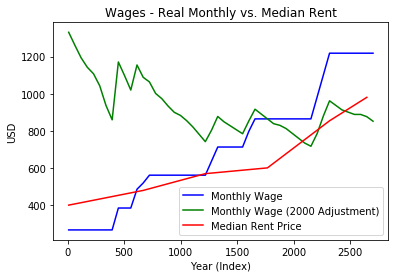

In [4]:
'''
In order to answer the above questions, I first need to create some additional data from the dataset
above. First, I adjust the real minimum wage to year 2000 USD equivalents by multiplying the real wage
numbers by the yearly rate of inflation adjustment[1]. I also created additional columns to convert the
hourly wage to gross monthly wages by multiplying the real and adjusted numbers by 168 (standard full time
monthly hours) and a column for percentage, dividing median rent by the adjusted monthly wage.
'''

# Create additional columns for dataframe object
wage['High.2000'] = wage['High.Value'] * wage['Rate.Inflation']
wage['Monthly.Wage'] = wage['High.Value'] * 168
wage['Adj.Monthly.Wage'] = wage['High.2000'] * 168
wage['Percent'] = wage['Rent.Median']/wage['Adj.Monthly.Wage']


''' 
Next, I need to establish trends for the national averages. I isolated only the 'Federal (FLSA)' values 
from the dataset and plot the monthly wage, adjusted monthly wage, and median rent prices.
'''

# Plot - wages vs 2000 adjustment for federal
fed_wage_year = wage.loc[wage['State']=='Federal (FLSA)']

plt.plot(fed_wage_year['Monthly.Wage'], color='b', label='Monthly Wage')
plt.plot(fed_wage_year['Adj.Monthly.Wage'], color='g', label='Monthly Wage (2000 Adjustment)')
plt.plot(fed_wage_year['Rent.Median'], color='r', label='Median Rent Price')
plt.xlabel('Year (Index)')
plt.ylabel('USD')
plt.legend(loc='lower right')
plt.title('Wages - Real Monthly vs. Median Rent')
plt.show()

In [5]:
'''
The plot in the cell above compares the real wage (blue) and year 2000 adjusted values (green), to the
median price of rent (red). This plot clarifies two points: first, it lends credibility to the narrative 
that while real wages have increased, wages adjusted for inflation have fallen over the ~50 year period, 
and second (and probably more worrying), while national minimum wage has grown to ~150% the cost of rent,
it is neither sufficient to cover the 33% rule, nor the 42% weight of the CPI. 
'''

'\nThe plot in the cell above compares the real wage (blue) and year 2000 adjusted values (green), to the\nmedian price of rent (red). This plot clarifies two points: first, it lends credibility to the narrative \nthat while real wages have increased, wages adjusted for inflation have fallen over the ~50 year period, \nand second (and probably more worrying), while national minimum wage has grown to ~150% the cost of rent,\nit is neither sufficient to cover the 33% rule, nor the 42% weight of the CPI. \n'

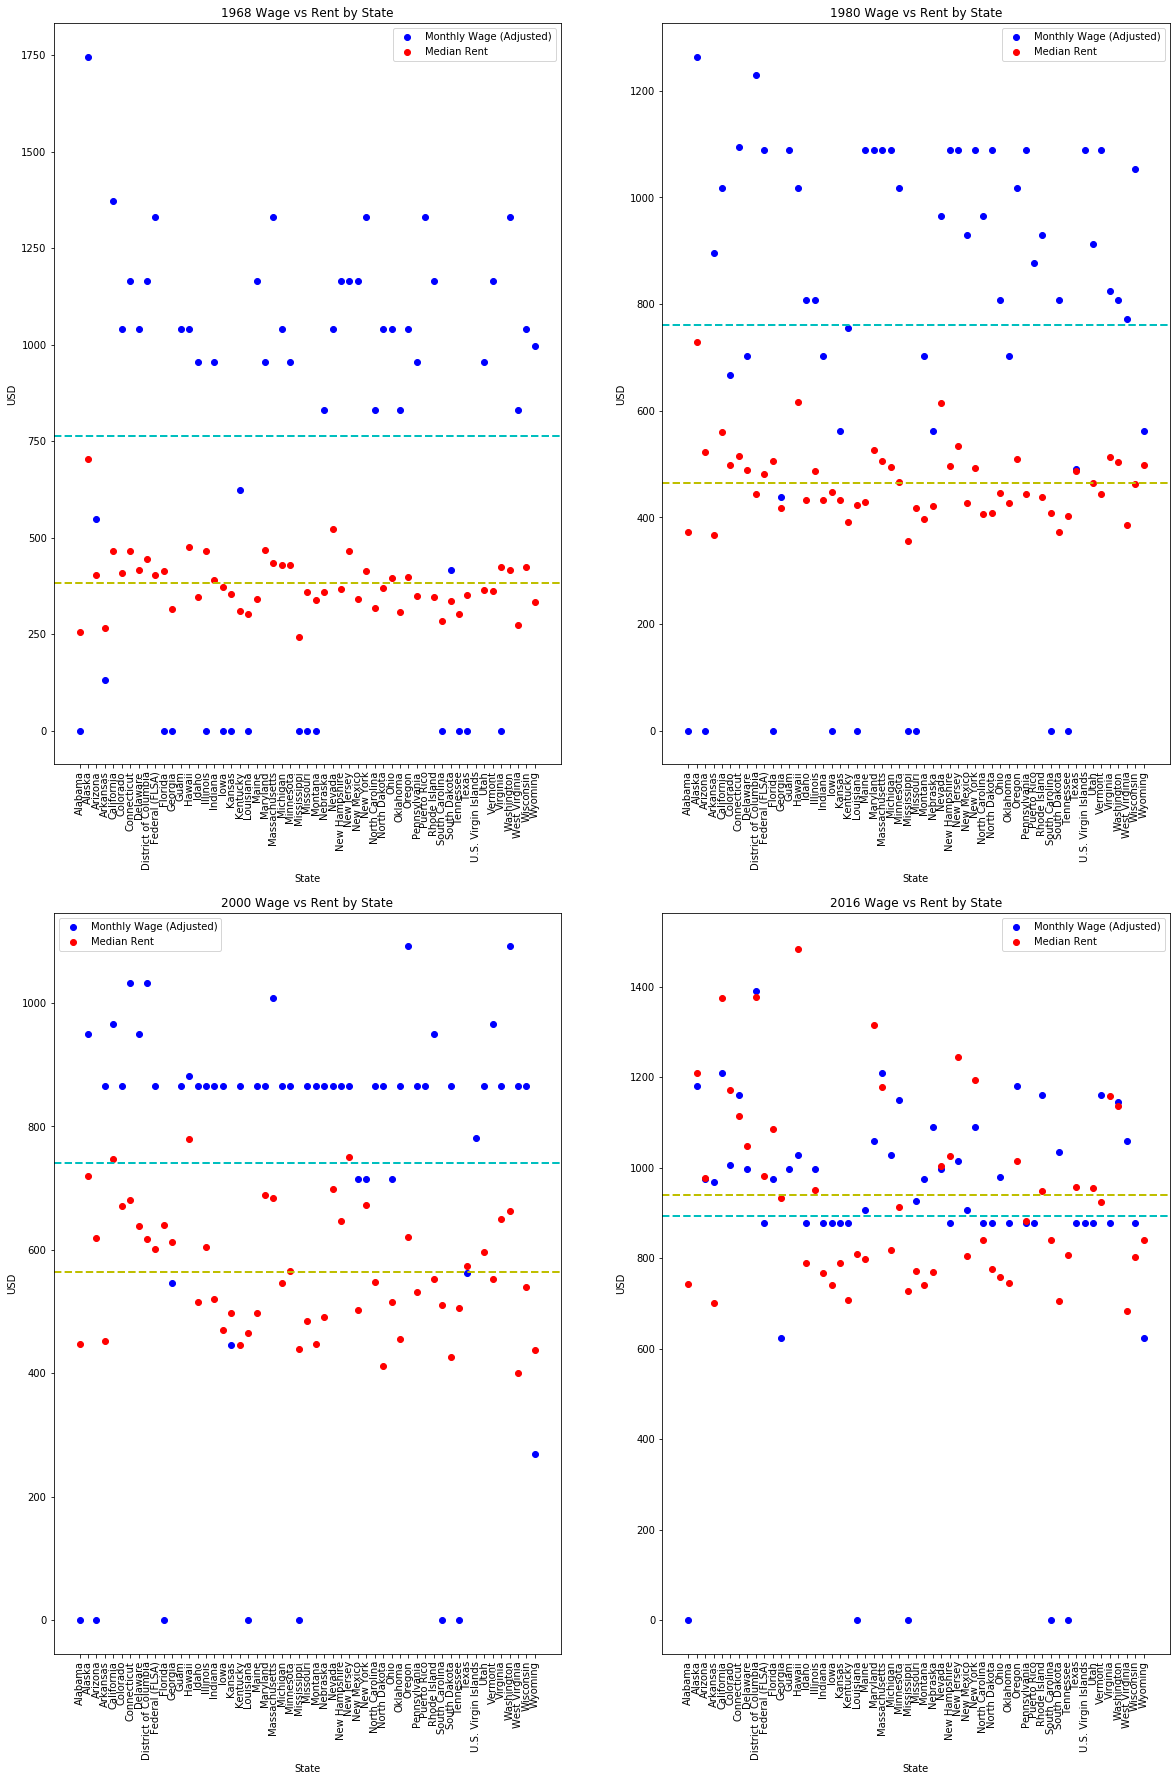

In [6]:
'''
While this trend is worrying, I wanted to dig deeper into individual states and years. To do this, I
first created dataframes isolating individuals years throughout the dataset. I plotted the points for each
year as a scatter representing each state's adjusted monthly wage and median rent.  
'''

# Isolate regular years throughout data
wage_1968 = wage.loc[lambda yr: wage['Year']==1968]
wage_1980 = wage.loc[lambda yr: wage['Year']==1980]
wage_2000 = wage.loc[lambda yr: wage['Year']==2000]
wage_2016 = wage.loc[lambda yr: wage['Year']==2016]

# Create figure and subplots
plt.figure(figsize=(20, 30))

plt.subplot(2,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_1968['State'], y=wage_1968['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_1968['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_1968['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('1968 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.scatter(x=wage_1980['State'], y=wage_1980['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_1980['State'], y=wage_1980['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_1980['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_1980['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('1980 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.scatter(x=wage_2000['State'], y=wage_2000['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_2000['State'], y=wage_2000['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_2000['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_2000['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('2000 Wage vs Rent by State')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.scatter(x=wage_2016['State'], y=wage_2016['Adj.Monthly.Wage'], color='b', label='Monthly Wage (Adjusted)')
plt.scatter(x=wage_2016['State'], y=wage_2016['Rent.Median'], color='r', label='Median Rent')
plt.axhline(wage_2016['Adj.Monthly.Wage'].mean(), color='c', linestyle='dashed', linewidth=2)
plt.axhline(wage_2016['Rent.Median'].mean(), color='y', linestyle='dashed', linewidth=2)
plt.xlabel('State')
plt.ylabel('USD')
plt.title('2016 Wage vs Rent by State')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

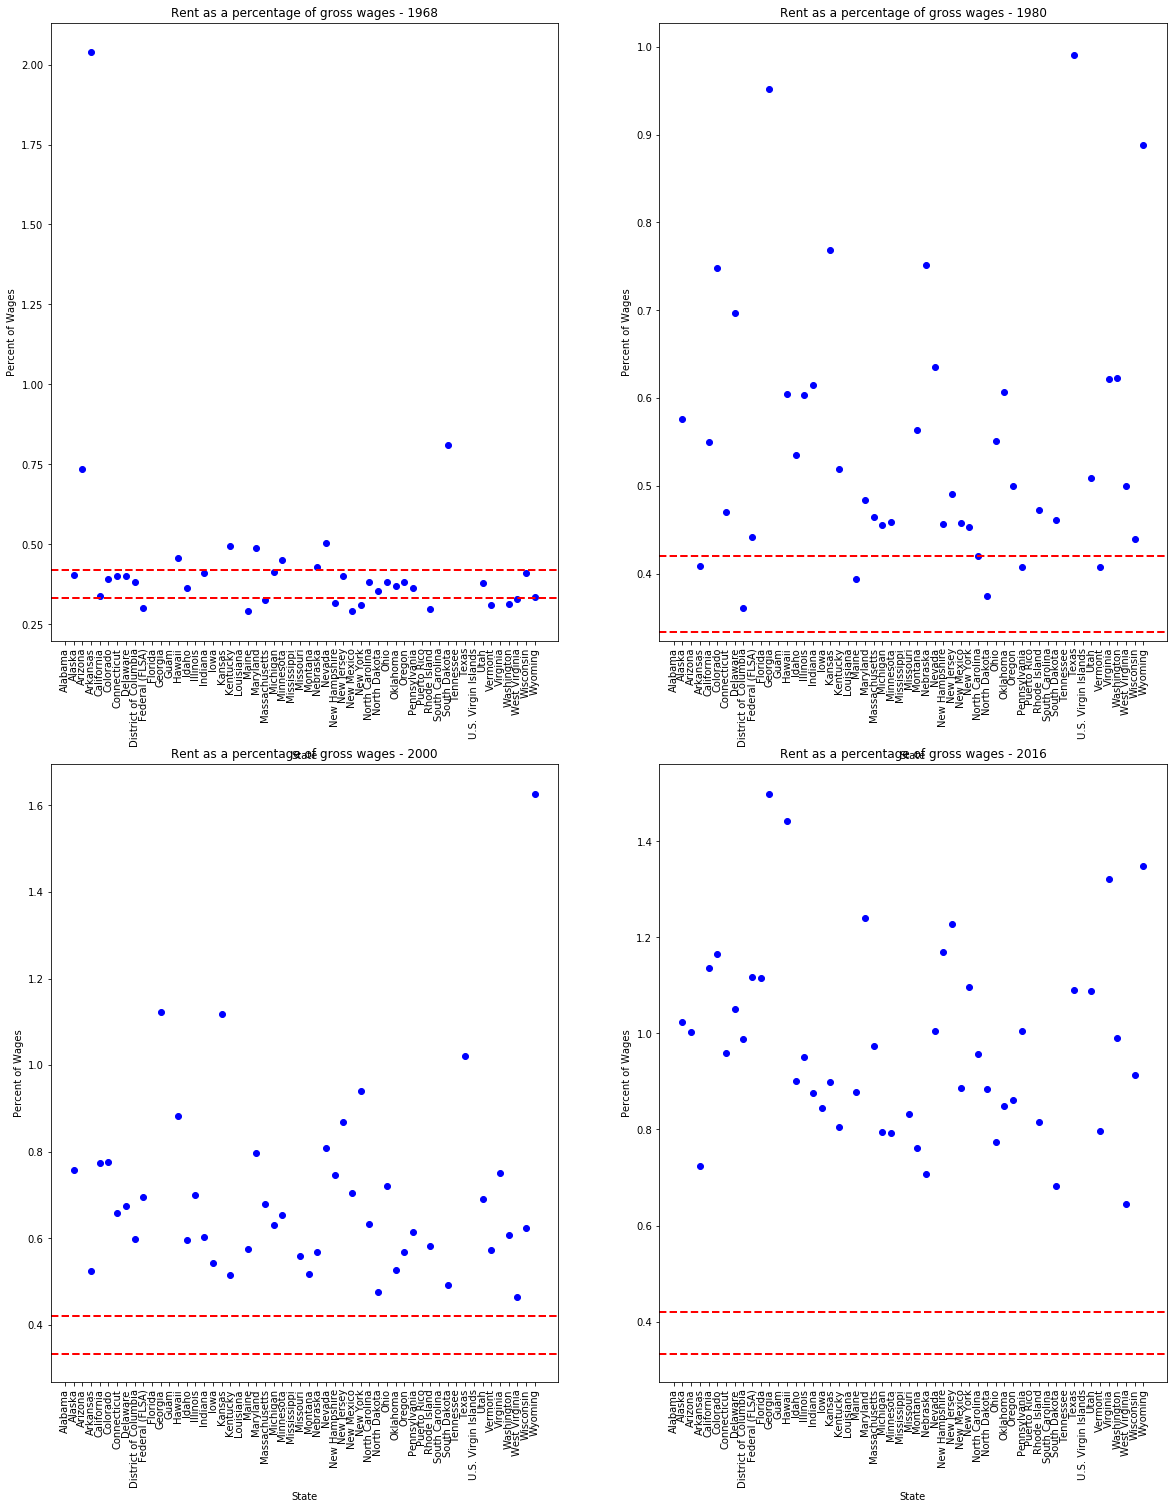

In [7]:
'''
In the above scatter plots, the picture of the initial question becomes quite a bit more clear. We can easily
see in the 1968 scatter plot, wages are two to three times the median rent for many states and the average wage
is nearly double the average cost of rent. However, by 2016, while wages did increase, rent prices quickly
approached 100% of wages.

Next, I want to see the same scatter plots equalized for percentages of rent, in accordance with the initial
question of this study. To do so, I use the column created earlier of rent as a percentage of adjusted monthly 
wage and plot the data for each state, noting the 33% and 42% lines.
'''
plt.figure(figsize=(20,25))

plt.subplot(2,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Percent'], color='b')
plt.title('Rent as a percentage of gross wages - 1968')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Rent as a percentage of gross wages - 1980')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.scatter(x=wage_1980['State'], y=wage_1980['Percent'], color='b')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('Rent as a percentage of gross wages - 2000')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.scatter(x=wage_2000['State'], y=wage_2000['Percent'], color='b')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.scatter(x=wage_2016['State'], y=wage_2016['Percent'], color='b')
plt.title('Rent as a percentage of gross wages - 2016')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.xticks(rotation=90)

plt.show()


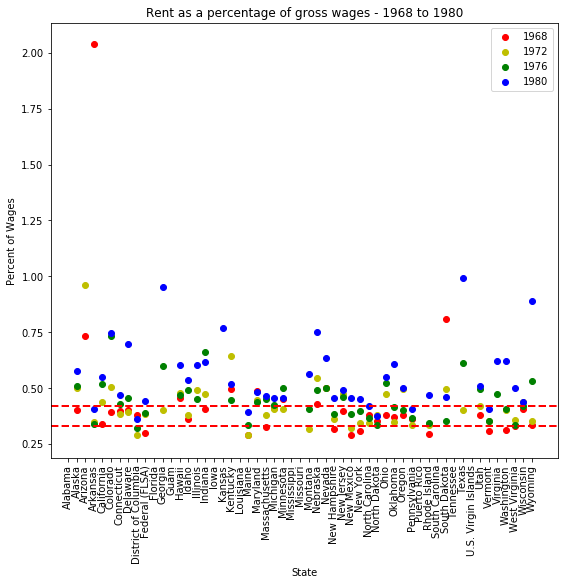

In [8]:
'''
The above charts help to clarify two points. First, they confirm the findings of the original question, that
rent has quickly grown away from the two points of affordability, as by 2016, even the lowest state's median is
greater than 60% of minimum monthly wages. Second, they suggest an answer to our second questions, that this 
disparity is not necessarily new but has been the case since at least as far back as 1980 (given that most states
fell below 42% and many below 33% as well).
'''

# Create dataframes intermittently from 1968 through 1980
wage_1972 = wage.loc[lambda yr: wage['Year']==1972]
wage_1976 = wage.loc[lambda yr: wage['Year']==1976]

# Plot all to single scatter
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(x=wage_1968['State'], y=wage_1968['Percent'], color='r', label='1968')
plt.scatter(x=wage_1972['State'], y=wage_1972['Percent'], color='y', label='1972')
plt.scatter(x=wage_1976['State'], y=wage_1976['Percent'], color='g', label='1976')
plt.scatter(x=wage_1980['State'], y=wage_1980['Percent'], color='b', label='1980')
plt.title('Rent as a percentage of gross wages - 1968 to 1980')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

'''
plt.subplot(1,2,2)
plt.scatter(x=wage_1980['State'], y=wage_1980['Percent.Change'], color='b')
plt.xlabel='State'
plt.ylabel='Percent Change'
plt.title('Percent Change - 1968 to 1980')
plt.xticks(rotation=90)
'''
plt.show()



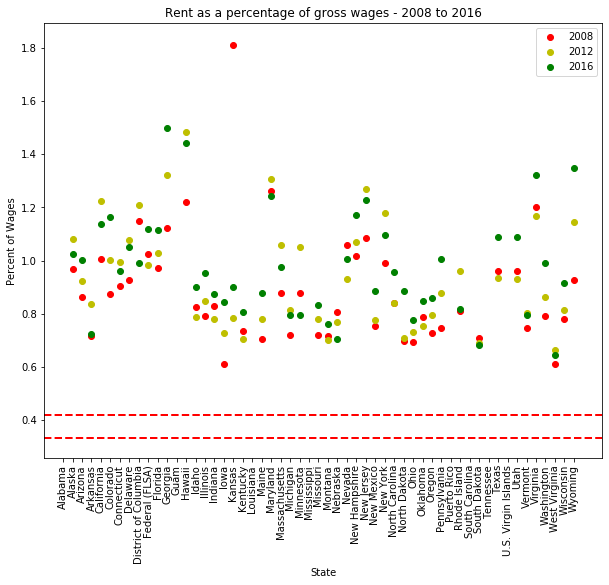

In [9]:
'''
Again, the scatter plot above confirms the answer to our second question, that while wages in 1968 were 
generallysufficient to constitute a "livable" wage, by 1980 the majority of states had a median rent greater 
than 42% of monthly wages. While this doesn't necessarily demonstrate a wage crisis, it does indicate that 
stagnation of wages may not be a recent trend, possibly going as far back as 1976-1980. 

To determine if this represents a significant change, I calculate the T and P-values for 1980 and 1968.
'''

print(wage_1968['Percent']).mean()
print(wage_1980['Percent']).mean()
y=wage_1980['Percent'].mean()-wage_1968['Percent'].mean()



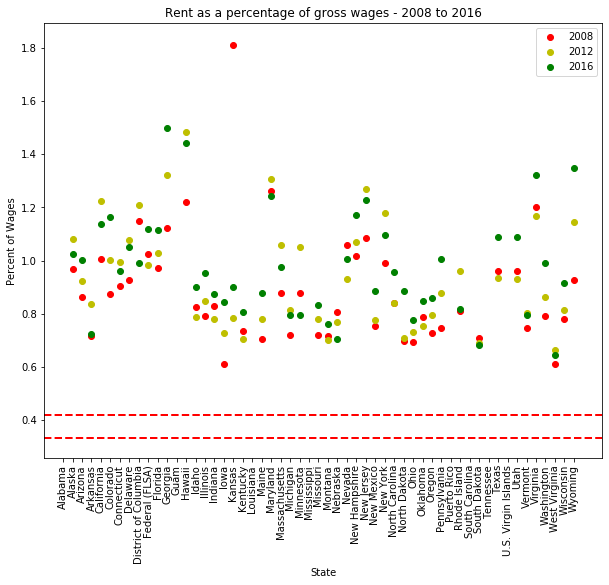

In [12]:
'''
For the third question, I created additional data frames to isolate the years from 2008-2016 and plotted the 
rent as a percent of wages for these three years. 
'''

# Dataframe for '08, '12
wage_2008 = wage.loc[lambda yr: wage['Year']==2008]
wage_2012 = wage.loc[lambda yr: wage['Year']==2012]

# Plot all to single scatter
plt.figure(figsize=(10,8))

plt.scatter(x=wage_2008['State'], y=wage_2008['Percent'], color='r', label='2008')
plt.scatter(x=wage_2012['State'], y=wage_2012['Percent'], color='y', label='2012')
plt.scatter(x=wage_2016['State'], y=wage_2016['Percent'], color='g', label='2016')
plt.title('Rent as a percentage of gross wages - 2008 to 2016')
plt.xlabel('State')
plt.ylabel('Percent of Wages')
plt.axhline(0.333, color='r', linestyle='dashed', linewidth=2)
plt.axhline(0.42, color='r', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.show()

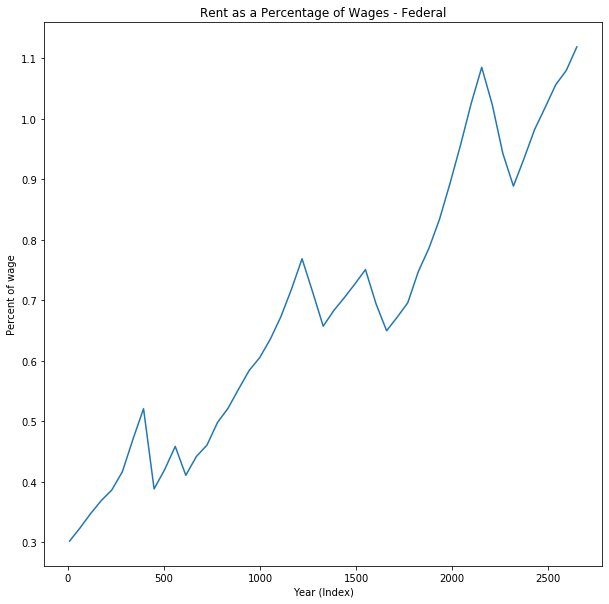

In [10]:
'''
Above we can see that rent as percentage is significantly higher in the last decade than in 1968 to 1980, and
the changes in these years are greater than the changes in the earlier years. Returning to the federal data, I 
plot the rent as percentage for federal year over year.
'''



plt.figure(figsize=(10,10))
plt.plot(fed_wage_year['Percent'])
plt.xlabel('Year (Index)')
plt.ylabel('Percent of wage')
plt.title('Rent as a Percentage of Wages - Federal')
plt.show()

In [11]:
'''
From a federal perspective, it appears that minimum wage was indeed at one point sufficient to afford rent.
Clearly, over the last 50 years this has changed
'''

'\nFrom a federal perspective, it appears that minimum wage was indeed at one point sufficient to afford rent.\nClearly, over the last 50 years this has changed\n'